In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [3]:
data_dir = "../data/aruba/data.csv"
df_aruba = pd.read_csv(
    data_dir,
    sep=r"\s+",
    names=[
        "date",
        "time",
        "sensor_type",
        "sensor_status",
        "meta",
        "meta_begin_end",
    ],
)

pattern_motion_sensor = r"[M]{1}[0-9]{3,}"
pattern_temperature_sensor = r"[T]{1}[0-9]{3,}"
pattern_door_closure_sensor = r"[D]{1}[0-9]{3,}"

# Create subsets for each sensor type
df_motion_sensor = df_aruba[df_aruba["sensor_type"].str.match(pattern_motion_sensor)]
df_temperature_sensor = df_aruba[df_aruba["sensor_type"].str.match(pattern_temperature_sensor)]
df_door_closure_sensor = df_aruba[df_aruba["sensor_type"].str.match(pattern_door_closure_sensor)]

display(df_motion_sensor[:3])
display(df_temperature_sensor[:3])
display(df_door_closure_sensor[:3])

# Show min/max values
print(
    "MIN Sensor Status (Temperature): ",
    min(df_temperature_sensor["sensor_status"]),
)
print(
    "MAX Sensor Status (Temperature): ",
    max(df_temperature_sensor["sensor_status"]),
)

,date,time,sensor_type,sensor_status,meta,meta_begin_end
0,2010-11-04,00:03:50.209589,M003,ON,Sleeping,begin
1,2010-11-04,00:03:57.399391,M003,OFF,NaN,NaN
15,2010-11-04,02:32:33.351906,M003,ON,NaN,NaN


,date,time,sensor_type,sensor_status,meta,meta_begin_end
2,2010-11-04,00:15:08.984841,T002,21.5,NaN,NaN
3,2010-11-04,00:30:19.185547,T003,21,NaN,NaN
4,2010-11-04,00:30:19.385336,T004,21,NaN,NaN


,date,time,sensor_type,sensor_status,meta,meta_begin_end
900,2010-11-04,09:26:55.872002,D002,OPEN,NaN,NaN
910,2010-11-04,09:27:24.02731,D002,CLOSE,NaN,NaN
1050,2010-11-04,09:44:45.825736,D004,OPEN,NaN,NaN


MIN Sensor Status (Temperature):  16
MAX Sensor Status (Temperature):  43


#### Daten einordnen / sortieren nach Skalenniveau
|Skalenniveau| Messbar   | Datentyp	| Lagemaße|
|------------|-----------|------------|------------|
|Nominal | Häufigkeit | Sensor Status (M = Motion ON/OFF), Sensor Status (D = Door OPEN/CLOSE)| Modus|
|Ordinal | Häufigkeit, Ordnung | Datum (date), Zeitstempel (time)| Modus, Median|
|Intervall |Häufigkeit, Ordnung, Abstand| Sensor Status (T = Temperature)| Modus, Median, Mittelwert|
|Verhältnis |Häufigkeit, Ordnung, Abstand, Nullpunkt| NaN | Modus, Median, Mittelwert|

In [4]:
# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt
df_motion_sensor["datetime"] = pd.to_datetime(
    df_motion_sensor["date"] + " " + df_motion_sensor["time"], format="ISO8601"
)
df_temperature_sensor["datetime"] = pd.to_datetime(
    df_temperature_sensor["date"] + " " + df_temperature_sensor["time"],
    format="ISO8601",
)
df_door_closure_sensor["datetime"] = pd.to_datetime(
    df_door_closure_sensor["date"] + " " + df_door_closure_sensor["time"],
    format="ISO8601",
)

# Sortiere die Daten nach Datum und Uhrzeit
df_motion_sensor = df_motion_sensor.sort_values(by="datetime")
df_temperature_sensor = df_temperature_sensor.sort_values(by="datetime")
df_door_closure_sensor = df_door_closure_sensor.sort_values(by="datetime")

# Konvertiere die sensor_status-Spalte in numerische Werte
df_temperature_sensor["sensor_status"] = pd.to_numeric(df_temperature_sensor["sensor_status"], errors="coerce")

# Erstelle ein Diagramm für jeden Temperatursensor
unique_sensors_motion = df_motion_sensor["sensor_type"].unique()
unique_sensors_temperature = df_temperature_sensor["sensor_type"].unique()
unique_sensors_door = df_door_closure_sensor["sensor_type"].unique()

# Array basierend auf den numerischen Teilen der IDs sortieren
sorted_sensors_motion = sorted(unique_sensors_motion, key=lambda x: int(x[1:]))
sorted_sensors_temperature = sorted(unique_sensors_temperature, key=lambda x: int(x[1:]))
sorted_sensors_door = sorted(unique_sensors_door, key=lambda x: int(x[1:]))

/tmp/ipykernel_858/2758927302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motion_sensor["datetime"] = pd.to_datetime(
/tmp/ipykernel_858/2758927302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temperature_sensor["datetime"] = pd.to_datetime(
/tmp/ipykernel_858/2758927302.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

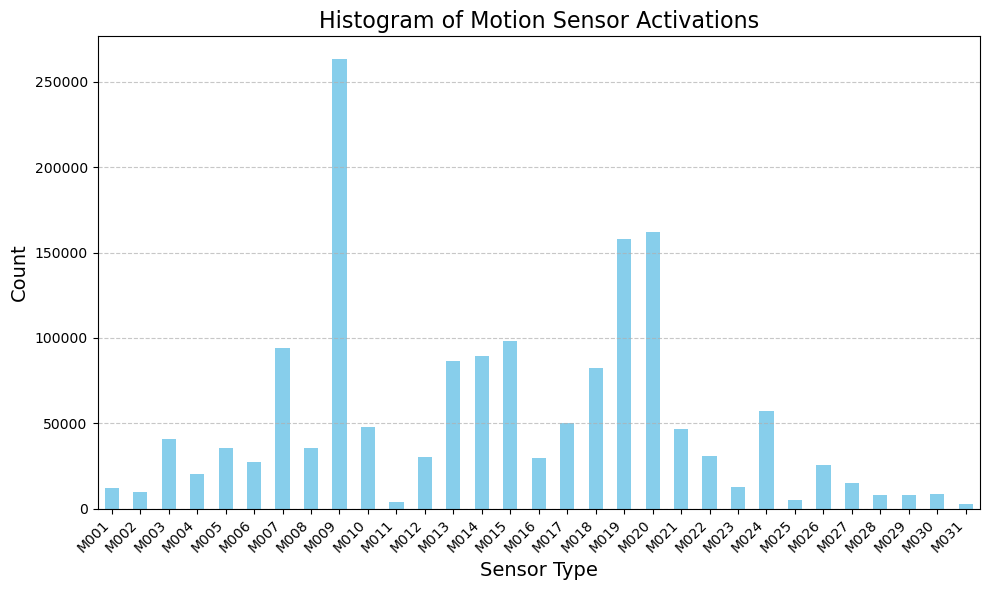

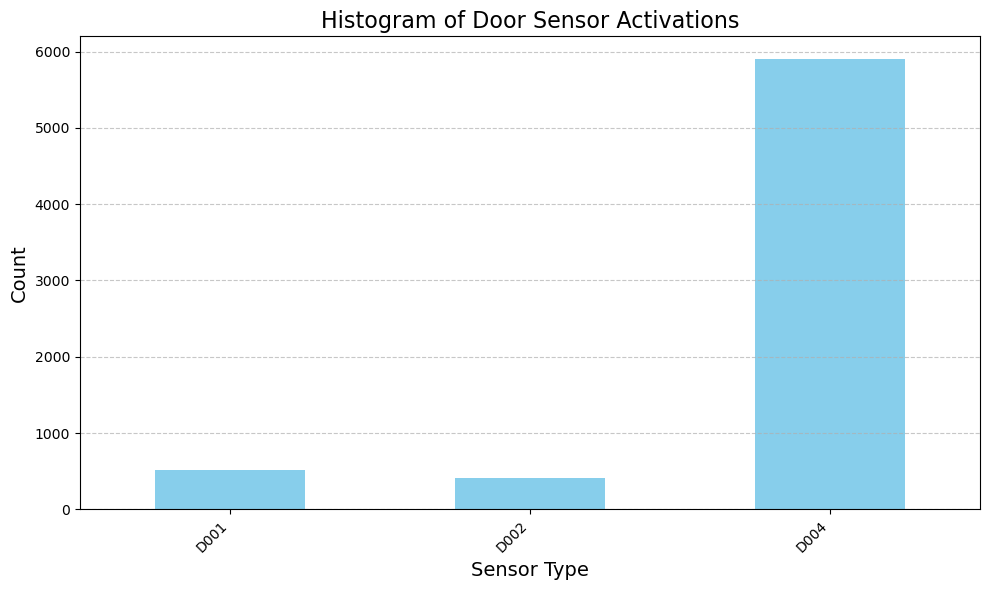

In [7]:
# Histogramm

# Plot histogram for the simulated df_motion_sensor
plt.figure(figsize=(10, 6))
motion_sensor_counts = df_motion_sensor["sensor_type"].value_counts().sort_index()
motion_sensor_counts.plot(kind="bar", color="skyblue")
plt.title("Histogram of Motion Sensor Activations", fontsize=16)
plt.xlabel("Sensor Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Plot histogram for the simulated df_motion_sensor
plt.figure(figsize=(10, 6))
door_sensor_counts = df_door_closure_sensor["sensor_type"].value_counts().sort_index()
door_sensor_counts.plot(kind="bar", color="skyblue")
plt.title("Histogram of Door Sensor Activations", fontsize=16)
plt.xlabel("Sensor Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Plotten der Sensordaten über die Zeit (Motion)

# Linien für jeden Sensor speichern
lines = {}
for sensor_id in sorted_sensors_motion:
    fig, ax = plt.subplots(figsize=(12, 6))
    sensor_data = df_motion_sensor[df_motion_sensor["sensor_type"] == sensor_id]
    (line,) = ax.plot(
        sensor_data["datetime"],
        sensor_data["sensor_status"],
        label=sensor_id,
        linestyle=":",
    )
    lines[sensor_id] = line

    ax.set_title("Bewegungsdaten")
    ax.set_xlabel("Zeit")
    ax.set_ylabel("Zustand (ON/OFF)")
    ax.legend()
    ax.grid(True)
plt.show()

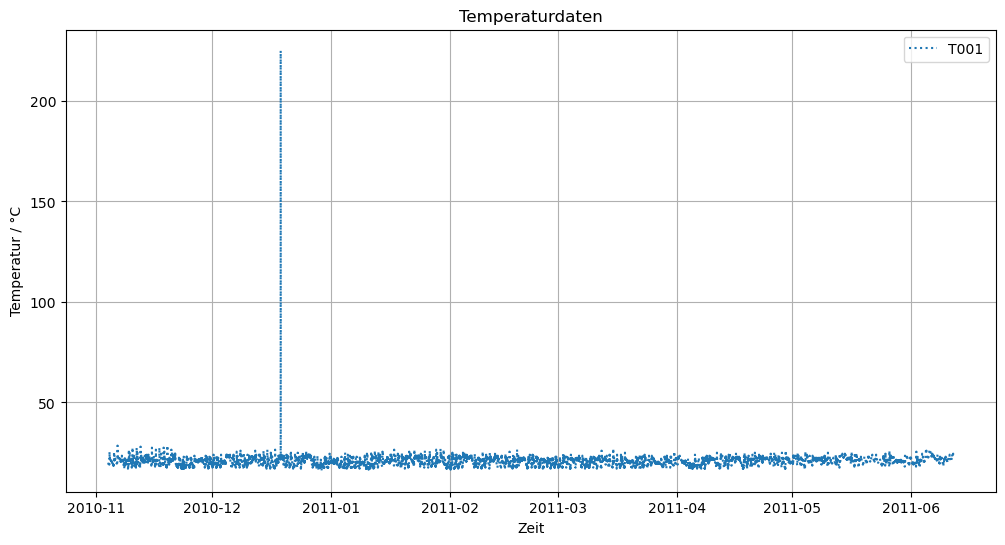

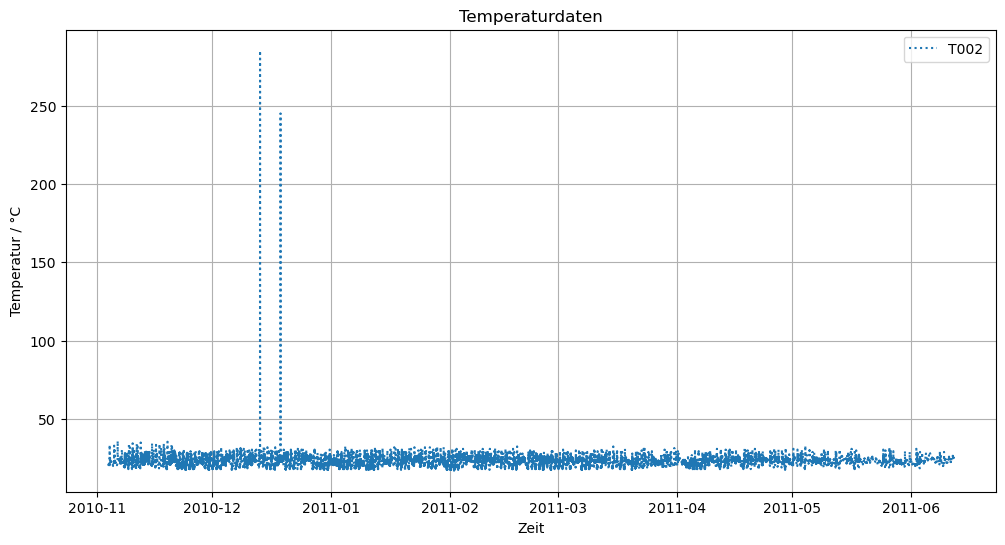

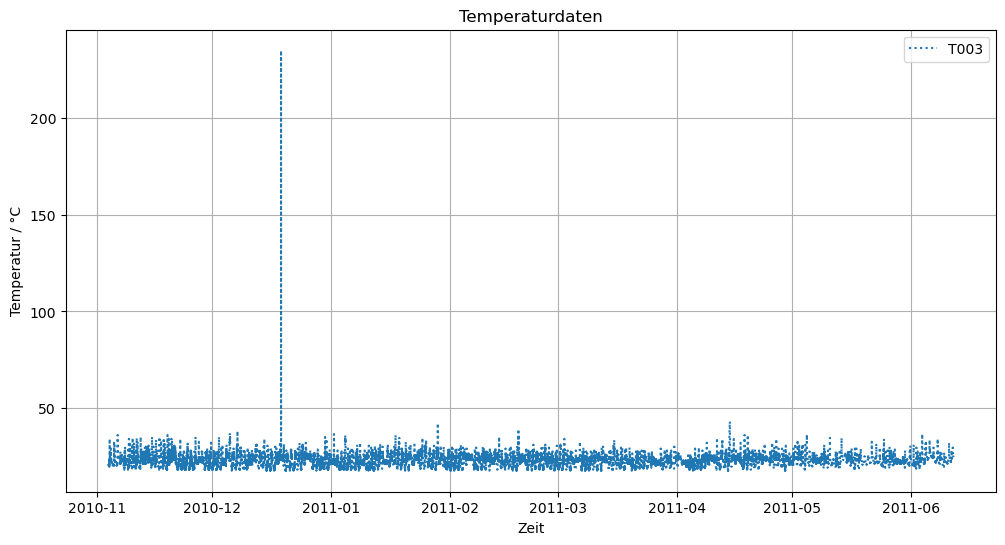

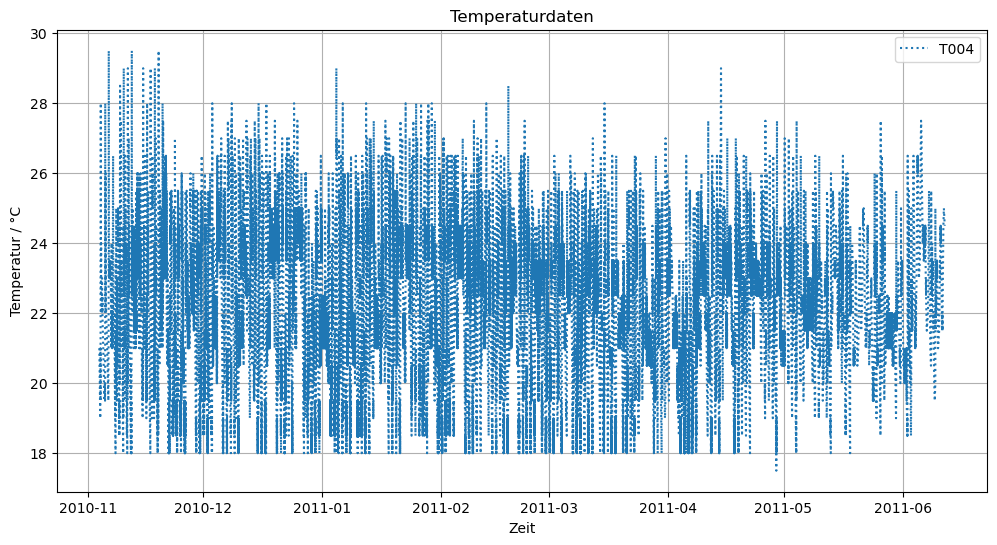

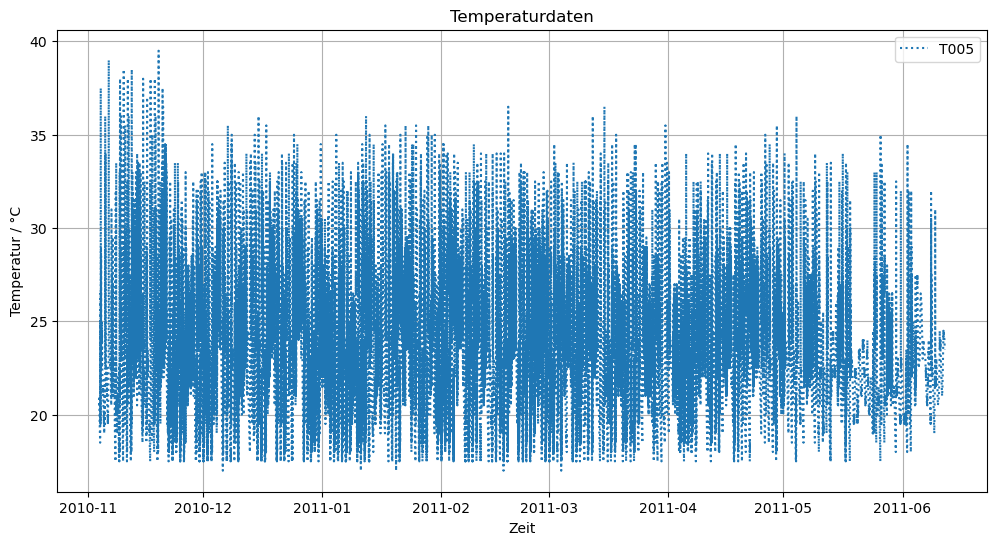

In [51]:
# Plotten der Sensordaten über die Zeit (Temperature)

# Linien für jeden Sensor speichern
lines = {}
for sensor_id in sorted_sensors_temperature:
    fig, ax = plt.subplots(figsize=(12, 6))
    sensor_data = df_temperature_sensor[df_temperature_sensor["sensor_type"] == sensor_id]
    (line,) = ax.plot(
        sensor_data["datetime"],
        sensor_data["sensor_status"],
        label=sensor_id,
        linestyle=":",
    )
    lines[sensor_id] = line

    ax.set_title("Temperaturdaten")
    ax.set_xlabel("Zeit")
    ax.set_ylabel("Temperatur / °C")
    ax.legend()
    ax.grid(True)
plt.show()

In [ ]:
# Plotten der Sensordaten über die Zeit (Door)

# Linien für jeden Sensor speichern
lines = {}
for sensor_id in sorted_sensors_door:
    fig, ax = plt.subplots(figsize=(12, 6))
    sensor_data = df_door_closure_sensor[df_door_closure_sensor["sensor_type"] == sensor_id]
    (line,) = ax.plot(
        sensor_data["datetime"],
        sensor_data["sensor_status"],
        label=sensor_id,
        linestyle=":",
    )
    lines[sensor_id] = line

    ax.set_title("Türstatus")
    ax.set_xlabel("Zeit")
    ax.set_ylabel("Status (OPEN/CLOSED)")
    ax.legend()
    ax.grid(True)
plt.show()